# Smile On 60+ - Last Dentist Visit - EDA

### Import modules

In [1]:
import pandas as pd
import dtale
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Seaborn settings

In [65]:
sns.set(rc={"figure.figsize":(13, 8)},font_scale=1.5, style='darkgrid')

# Palette details
smileplus_palette = sns.color_palette(["#EE2737", "#FBF9F9", "#18425A", "#507184"])

### Read in CLEAN .csv

In [2]:
smileon_df = pd.read_csv('../data/Smileon.2021.10.17.CLEAN.csv')

### Check DataFrame
- Exporting to .csv does not keep custom datatypes

In [3]:
# Set it to None to display all columns in the dataframe
#pd.set_option('display.max_columns', None)
#smileon_df.info()
#smileon_df.head()

### Convert column datatypes

In [4]:
# Dropping Transgender and Other since there are 0 Dental Conditions for those genders
# Dropping Dont Know for Dental condition
indexNames = smileon_df[
    (smileon_df['Gender'] == 'Transgender') |
    (smileon_df['Gender'] == 'Other') |
    (smileon_df['Dental condition'] == 'Dont know')
].index
smileon_df.drop(indexNames, inplace=True)

# Convert columns to category
smileon_df[[
    'City',
    'County',
    'Reviewed', 
    'ReferralsMade',
    'Are you limited in what you can eat?',
    'QofL affected by dental condition',
    'Dental condition',
    'What is the outcome for the client?',
    'Gender', 
    'Household Income', 
    'Race/Ethnicity', 
    'Last dentist visit',
    'Is the treatment plan completed?',
    'Was enrollee restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)'
]] = smileon_df[[
    'City',
    'County',
    'Reviewed', 
    'ReferralsMade',
    'Are you limited in what you can eat?',
    'QofL affected by dental condition',
    'Dental condition',
    'What is the outcome for the client?',
    'Gender', 
    'Household Income', 
    'Race/Ethnicity', 
    'Last dentist visit',
    'Is the treatment plan completed?',
    'Was enrollee restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)'
]].apply(pd.Categorical)

#### Prepare columns to be converted to datetime
- Check for null values and figure out what to do with them

In [6]:
#smileon_df['Last dentist visit'].isnull().sum()

In [7]:
# Convert columns to datetime
smileon_df['Last Screening'] = pd.to_datetime(
    smileon_df['Last Screening'], 
    errors = 'coerce'
).dt.strftime('%m/%d/%Y')

smileon_df['Eligibility Verification Date'] = pd.to_datetime(
    smileon_df['Eligibility Verification Date'], 
    errors = 'coerce'
).dt.strftime('%m/%d/%Y')

smileon_df[[
    'CallStart', 
    'CallEnd', 
    'Last Screening', 
    'Eligibility Verification Date'
]] = smileon_df[[
    'CallStart', 
    'CallEnd', 
    'Last Screening', 
    'Eligibility Verification Date'
]].apply(pd.to_datetime)

### Exploring smileon_df with dtale

In [8]:
#d = dtale.show(smileon_df)
# Open it in a new window in browser
#d.open_browser()

### Create DataFrame with columns surrounding dental condition
- Total patients: 10,709

In [9]:
#smileon_df.head()
dental_df = smileon_df[[
    'PatientID',
    'Birth Year',
    'Last dentist visit',
    'Dental condition',
    'Gender'
]].copy()

patient_cnt = dental_df['PatientID'].nunique()
#print(patient_cnt)
#patient_age_df.head()

### Clean Last dentist visit column for analysis
- Null cnt: 3410

In [16]:
# Get null count
#dental_df['Last dentist visit'].isnull().sum()

In [17]:
# Drop rows with missing Dental condition values
dental_df.dropna(subset=['Last dentist visit'], inplace=True)
assert dental_df['Last dentist visit'].isnull().sum() == 0

In [18]:
# Grab index names for .drop() method
indexNames = dental_df[
    (smileon_df['Birth Year'] == '2298') | 
    (smileon_df['Birth Year'] == '5245') |
    (smileon_df['Birth Year'] == '#VALUE!') |
    (smileon_df['Birth Year'] == '#NUM!') |
    (smileon_df['Birth Year'] == '1900') |
    (smileon_df['Birth Year'] == '2018') |
    (smileon_df['Birth Year'] == '2019') |
    (smileon_df['Birth Year'] == '2020') |
    (smileon_df['Birth Year'] == '2021') |
    (smileon_df['Birth Year'] == 1900) |
    (smileon_df['Birth Year'] == 2018) |
    (smileon_df['Birth Year'] == 2019) |
    (smileon_df['Birth Year'] == 2020) |
    (smileon_df['Birth Year'] == 2021) |
    (smileon_df['Birth Year'] == 2041) |
    (smileon_df['Birth Year'] == 2354)
].index

# Drop invalid Birth Years
dental_df.drop(indexNames, inplace=True)

# Drop duplicate PatientIDs
dental_df.drop_duplicates(subset = ['PatientID'], inplace = True)

### Calculate age of patients and add to new column

In [19]:
dental_df['Birth Year'] = dental_df['Birth Year'].astype('int')
assert dental_df['Birth Year'].dtypes == 'int32'
dental_df['Age'] = 2021 - dental_df['Birth Year']
#dental_df['Age'].dtypes
#dental_df['Age']

### Convert PatientID to object and drop Birth Year column

In [20]:
dental_df['PatientID'] = dental_df['PatientID'].astype('object')
assert dental_df['PatientID'].dtypes == 'object'
dental_df.drop(columns = ['Birth Year'], inplace = True)
#dental_df.describe()

### Explorting dental_df with dtale

In [22]:
#d = dtale.show(dental_df)
# Open it in a new window in browser
#d.open_browser()

### Last dentist visit stats
- **39.7%** of the patients of this dataset visited the dentist less than 12 months ago.
- **27%** of patients of this dataset visited the dentist more than 5 years ago.
    - **61.4%** females and **38.5%** males have not visited a dentist in more than 5 years ago
        - Female cnt: **1576**
        - Male cnt: **989**
        - Transgender: **?**
        - Other: **?**

- What are the patient age stats of last dentist visit more than 5 years ago?
    - **10%** are 64
    - Avg: **69**
    - Min: **27**
    - Median: **67**
    - Max: **101**
    - 25% Quartile: **64**
    - 75% Quartile: **74**

In [55]:
#dental_df['Last dentist visit'].describe()
dental_df['Last dentist visit'].value_counts(normalize = True)

Less than 12 months    0.397265
More than 5 years      0.269263
1 to 2 years           0.196179
3 to 5 years           0.137294
Name: Last dentist visit, dtype: float64

#### Last dentist visit: Gender

In [34]:
#dental_df[dental_df['Gender'] == 'Female']['Last dentist visit'].describe()
#dental_df[dental_df['Gender'] == 'Female']['Last dentist visit'].value_counts(normalize = True)
#dental_df[dental_df['Last dentist visit'] == 'More than 5 years']['Gender'].value_counts()

#### Last dentist visit: Age

In [39]:
#dental_df[dental_df['Last dentist visit'] == 'More than 5 years']['Age'].describe()
#dental_df[dental_df['Last dentist visit'] == 'More than 5 years']['Age'].value_counts(normalize = True)

#### Last dentist visit: Gender vs Age

In [18]:
#dental_df[(dental_df['Last dentist visit'] == 'Yes') & (dental_df['Gender'] == 'Female')]['Age'].describe()
#dental_df[(dental_df['Last dentist visit'] == 'Yes') & (dental_df['Gender'] == 'Female')]['Age'].value_counts(normalize = True)
#dental_df[(dental_df['Last dentist visit'] == 'Yes') & (dental_df['Gender'] == 'Male')]['Age'].describe()
#dental_df[(dental_df['Last dentist visit'] == 'Yes') & (dental_df['Gender'] == 'Male')]['Age'].value_counts(normalize = True)

### Dental Condition stats
- **45.1%** of the patients of this dataset has ***poor*** dental condition.
    - Between genders, **61.4%** are females vs. **38.5%** are males
        - Female cnt: **2547**
        - Male cnt: **1600**
        - Transgender: **0**
        - Other: **0**
- **32%** of the patients of this dataset has ***fair*** dental condition.
    - Between genders, **64.2%** are females vs. **35.7%** are males
        - Female cnt: **1892**
        - Male cnt: **1052**
        - Transgender: **0**
        - Other: **0**
- **15.8%** of the patients of this dataset has ***good*** dental condition.
    - Between genders, **67.5%** are females vs. **32.4%** are males
        - Female cnt: **981**
        - Male cnt: **471**
        - Transgender: **0**
        - Other: **0**
- **4.3%** of the patients of this dataset ***don't know*** their dental condition.
- **2.6%** of the patients of this dataset has ***very good*** dental condition.
- What are the patient age stats with ***poor*** dental condition.
    - **10.1%** are 64, **9.4%** are 63, and **8.7%** are 65
    - Avg: **68**
    - Min: **30**
    - Median: **66**
    - Max: **102**
    - 25% Quartile: **64**
    - 75% Quartile: **72**
- What are the patient age stats with ***fair*** dental condition.
    - **8.5%** are 65, **8%** are 64, and **7.5%** are 63
    - Avg: **70**
    - Min: **27**
    - Median: **68**
    - Max: **101**
    - 25% Quartile: **64**
    - 75% Quartile: **75**
- What are the patient age stats with ***good*** dental condition.
    - **7.2%** are 64, **6.5%** are 65, and **6.4%** are 66
    - Avg: **70**
    - Min: **27**
    - Median: **68**
    - Max: **101**
    - 25% Quartile: **64**
    - 75% Quartile: **75**

In [23]:
#dental_df['Dental condition'].describe()
#dental_df['Dental condition'].value_counts(normalize = True)

#### Dental condition: Gender

In [24]:
#dental_df[dental_df['Gender'] == 'Female']['Dental condition'].describe()
#dental_df[dental_df['Gender'] == 'Female']['Dental condition'].value_counts(normalize = True)
#dental_df[dental_df['Dental condition'] == 'Good']['Gender'].value_counts(normalize = True)

#### Dental condition: Age

In [44]:
#dental_df[dental_df['Dental condition'] == 'Poor']['Age'].describe()
#dental_df[dental_df['Dental condition'] == 'Very Good']['Last dentist visit'].value_counts(normalize = True)

#### Dental condition: Gender vs Age

In [52]:
#dental_df[(dental_df['Dental condition'] == 'Poor') & (dental_df['Gender'] == 'Female')]['Last dentist visit'].describe()
#dental_df[(dental_df['Dental condition'] == 'Poor') & (dental_df['Gender'] == 'Female')]['Last dentist visit'].value_counts(normalize = True)
#dental_df[(dental_df['Dental condition'] == 'Poor') & (dental_df['Gender'] == 'Male')]['Last dentist visit'].describe()
#dental_df[(dental_df['Dental condition'] == 'Poor') & (dental_df['Gender'] == 'Male')]['Last dentist visit'].value_counts(normalize = True)

### Visualize Age & Gender data

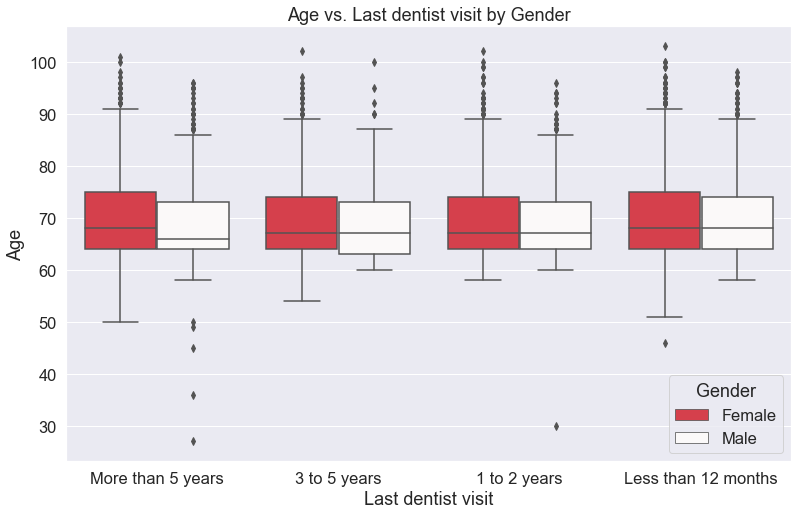

In [66]:
sns.boxplot(
    data = dental_df, 
    x = 'Last dentist visit', 
    y = 'Age', 
    hue = 'Gender',
    order = ['More than 5 years', '3 to 5 years', '1 to 2 years', 'Less than 12 months'],
    palette = smileplus_palette
).set(title = 'Age vs. Last dentist visit by Gender')
plt.legend(loc='lower right', title='Gender')